In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Discrete Fourier Transform (DFT)

In [2]:
x = np.array([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1])
x_dft = np.fft.fft(x)

In [3]:
x_dft

array([ 8.10000000e+01+0.j        , -2.88652979e+01-5.39585933j,
        2.41264070e-01+0.0934662j , -2.83816557e+00-1.75731772j,
        2.12479910e-01+0.19370103j, -7.58287827e-01-1.00413536j,
        1.54155956e-01+0.30958689j, -1.88385685e-01-0.662107j  ,
        4.22370376e-02+0.45581023j,  4.22370376e-02-0.45581023j,
       -1.88385685e-01+0.662107j  ,  1.54155956e-01-0.30958689j,
       -7.58287827e-01+1.00413536j,  2.12479910e-01-0.19370103j,
       -2.83816557e+00+1.75731772j,  2.41264070e-01-0.0934662j ,
       -2.88652979e+01+5.39585933j])

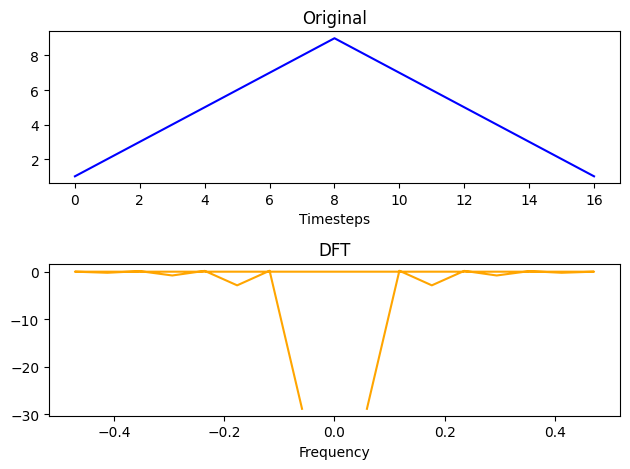

In [4]:
freq = np.fft.fftfreq(x.shape[-1])

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

ax1.plot(x, color='blue')
ax1.set_xlabel('Timesteps')
ax1.set_title('Original')

ax2.plot(freq[1:], x_dft.real[1:], color='orange')
ax2.set_xlabel('Frequency')
ax2.set_title('DFT')

plt.tight_layout()

In [5]:
x = np.array([1.1,2.4,3.9,4.2])
x_dft = np.fft.fft(x)

x_dft

array([11.6+0.j , -2.8+1.8j, -1.6+0.j , -2.8-1.8j])

## Individual BOSS

In [6]:
from sktime.datasets import load_basic_motions

X_train, y_train = load_basic_motions(split='train', return_type='numpy3D')
X_test, y_test = load_basic_motions(split='test', return_type='numpy3D')

uni_X_train = X_train[:, 0:1, :]
uni_X_test = X_test[:, 0:1, :]

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score

from sktime.classification.dictionary_based import IndividualBOSS

boss = IndividualBOSS(n_jobs=-1, random_state=42)

params = {
    'window_size': [10, 20, 30],
    'word_length': [2,3,4],
    'alphabet_size': [2,3,4]
}

tuned_boss = GridSearchCV(
    boss,
    params,
    cv=KFold(n_splits=4)
)

tuned_boss.fit(uni_X_train, y_train)
y_pred = tuned_boss.predict(uni_X_test)

print(tuned_boss.best_params_)
print(accuracy_score(y_test, y_pred))

{'alphabet_size': 2, 'window_size': 10, 'word_length': 2}
0.575


## BOSS Ensemble

In [10]:
import time
from sktime.classification.dictionary_based import BOSSEnsemble

start = time.time()

boss = BOSSEnsemble(n_jobs=-1, random_state=42)

params = {
    'alphabet_size': [2,3,4],
    'feature_selection': ["chi2", "random"]
}

tuned_boss = GridSearchCV(
    boss,
    params,
    cv=KFold(n_splits=4)
)

tuned_boss.fit(uni_X_train, y_train)
y_pred = tuned_boss.predict(uni_X_test)

end = time.time()

print(f"Elapsed time: {round(end-start,0)} seconds or {round((end-start)/60,0)} minutes")
print(tuned_boss.best_params_)
print(accuracy_score(y_test, y_pred))

Elapsed time: 251.287339925766 seconds or 4.1881223320961 minutes
{'alphabet_size': 2, 'feature_selection': 'chi2'}
0.975


## cBOSS

In [11]:
from sktime.classification.dictionary_based import ContractableBOSS

start = time.time()

c_boss = ContractableBOSS(n_jobs=-1, random_state=42)

params = {
    'min_window': [5,10,20],
    'feature_selection': ["chi2", "random"]
}

tuned_boss = GridSearchCV(
    c_boss,
    params,
    cv=KFold(n_splits=4)
)

tuned_boss.fit(uni_X_train, y_train)
y_pred = tuned_boss.predict(uni_X_test)

end = time.time()

print(f"Elapsed time: {round(end-start,0)} seconds or {round((end-start)/60,0)} minutes")
print(tuned_boss.best_params_)
print(accuracy_score(y_test, y_pred))

Elapsed time: 226.0 seconds or 4.0 minutes
{'feature_selection': 'chi2', 'min_window': 5}
0.975
